<a href="https://colab.research.google.com/github/iamudyavar/machine-learning-practice-project/blob/main/solubility-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First ML Project

In this project, we will predict the aqueous solubility of a molecule (how easily the molecule dissolves in water) based on its molecular descriptors, including the logarithm of the partition coefficient (MolLogP), molecular weight (MolWt), number of rotatable bonds (NumRotatableBonds), proportion of aromatic atoms (AromaticProportion), and other relevant features.

## **Loading the data**

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **Preparing the data**

### Separating X and Y

In [ ]:
y = df["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [ ]:
X = df.drop("logS", axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [ ]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


## **Building the model**

### Linear Regression

**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)  # The fit() function trains the model with the given data

LinearRegression()

**Applying the model to make a predicton**

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [ ]:
y_lr_train_pred

In [ ]:
y_lr_test_pred

**Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Checking model performance on the training data
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# Checking model performance on the testing data
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
# Performance at a glance
print(f'LR MSE (Train): {lr_train_mse}')
print(f'LR R^2 (Train): {lr_train_r2}')
print(f'LR MSE (Test): {lr_test_mse}')
print(f'LR R^2 (Test): {lr_test_r2}')

LR MSE (Train): 1.0075362951093687
LR R^2 (Train): 0.7645051774663391
LR MSE (Test): 1.0206953660861033
LR R^2 (Test): 0.7891616188563282


In [ ]:
# A cleaner way to view these metrics using a dataframe
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R^2', 'Testing MSE', 'Testing R^2']
lr_results

,Method,Training MSE,Training R^2,Testing MSE,Testing R^2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


### Random Forest

**Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)  # The fit() function trains the model with the given data

RandomForestRegressor(max_depth=2, random_state=100)

**Applying the model to make a predicton**

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [ ]:
y_rf_train_pred

In [ ]:
y_rf_test_pred

**Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Checking model performance on the training data
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

# Checking model performance on the testing data
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
# Performance at a glance
print(f'RF MSE (Train): {rf_train_mse}')
print(f'RF R^2 (Train): {rf_train_r2}')
print(f'RF MSE (Test): {rf_test_mse}')
print(f'RF R^2 (Test): {rf_test_r2}')

RF MSE (Train): 1.028227802112806
RF R^2 (Train): 0.7596688824431413
RF MSE (Test): 1.407688264904896
RF R^2 (Test): 0.7092230211002489


In [ ]:
# A cleaner way to view these metrics using a dataframe
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R^2', 'Testing MSE', 'Testing R^2']
rf_results

,Method,Training MSE,Training R^2,Testing MSE,Testing R^2
0,Linear regression,1.028228,0.759669,1.407688,0.709223


### Model comparison

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R^2,Testing MSE,Testing R^2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Linear regression,1.028228,0.759669,1.407688,0.709223


## **Visualizing the results**

Text(0.5, 0, 'Experimental logS')

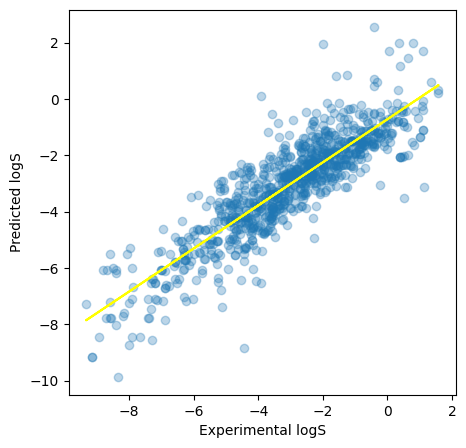

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#FFFF00')
plt.ylabel('Predicted logS')
plt.xlabel('Experimental logS')